In [21]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [22]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks/HeartAttack


In [24]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/HeartAttack")

In [25]:
df = pd.read_csv("heart.csv")

In [26]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

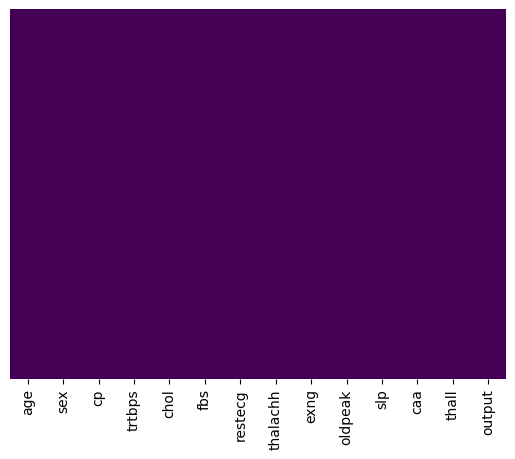

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


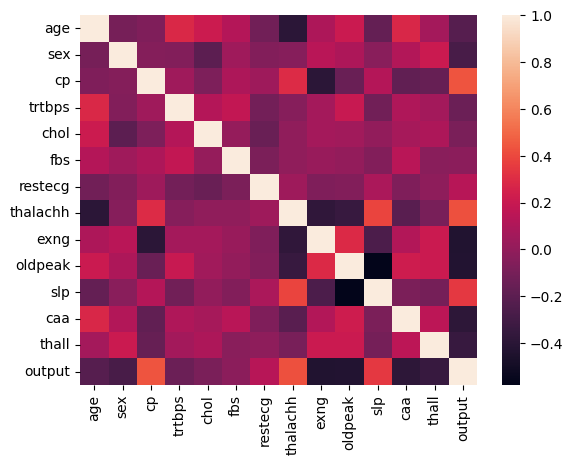

In [29]:
sns.heatmap(df.corr());

#Trenowanie modelu

In [30]:
X = df.drop(["output"], axis=1)
y = df["output"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, test_size=0.10,
                                                    random_state=101)

In [32]:
def model(X_train, y_train):
  forest = RandomForestClassifier(n_estimators=10, random_state=101)
  forest.fit(X_train, y_train)
  print(f"Las: {forest.score(X_train, y_train)}")

  lreg = LogisticRegression(max_iter=5000)
  lreg.fit(X_train, y_train)
  print(f"Regresja logistyczna: {lreg.score(X_train, y_train)}")

  tree = DecisionTreeClassifier()
  tree.fit(X_train, y_train)
  print(f"Drzewa decyzyjne: {tree.score(X_train, y_train)}")

  xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
  xgb.fit(X_train, y_train)
  print(f"XGBoost: {xgb.score(X_train, y_train)}")

  return forest, lreg, tree, xgb

forest, lreg, tree, xgb = model(X_train, y_train)

Las: 0.9852941176470589
Regresja logistyczna: 0.8455882352941176
Drzewa decyzyjne: 1.0
XGBoost: 1.0


In [33]:
y1_predict = forest.predict(X_test)
print(f"Random Forest {accuracy_score(y_test, y1_predict)}")

y2_predict = lreg.predict(X_test)
print(f"Logistic Regresion {accuracy_score(y_test, y2_predict)}")

y3_predict = tree.predict(X_test)
print(f"Desision Tree {accuracy_score(y_test, y3_predict)}")

y4_predict = xgb.predict(X_test)
print(f"Xgb {accuracy_score(y_test, y4_predict)}")

Random Forest 0.8387096774193549
Logistic Regresion 0.8387096774193549
Desision Tree 0.8387096774193549
Xgb 0.8709677419354839


In [34]:
print("Ocena modelu 1. Las")
print(classification_report(y_test, y1_predict))

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.87      0.81      0.84        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [35]:
print("Ocena modelu 2. Regresja logistyczna")
print(classification_report(y_test, y2_predict))

Ocena modelu 2. Regresja logistyczna
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [36]:
print("Ocena modelu 3. Drzewa decyzyjne")
print(classification_report(y_test, y3_predict))

Ocena modelu 3. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.87      0.81      0.84        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [37]:
print("Ocena modelu 4. Xgb")
print(classification_report(y_test, y4_predict))

Ocena modelu 4. Xgb
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



#Eksport modelu

In [38]:
filename = "heart_attack.pkl"
pickle.dump(lreg, open(filename, "wb"))